In [1]:
## Honey Production Exercise

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")
print(df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [2]:
# mean total production for year
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


-88303.18915238195 181208083.10732982


Text(0,0.5,'Total Production')

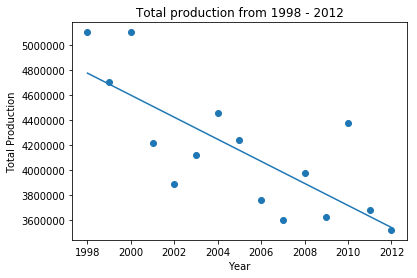

In [19]:
# 'X' - years, 'y' - totalprod
X = prod_per_year.year.values.reshape(-1, 1) # 2D array
y = prod_per_year.totalprod.values

plt.scatter(X,y)

# fit linear regression model
regr = linear_model.LinearRegression()
regr.fit(X, y)
m = regr.coef_[0]
b = regr.intercept_
print(m,b)
y_predict = regr.predict(X)
plt.plot(X, y_predict)

# add title and label axes
plt.title('Total production from 1998 - 2012')
plt.xlabel('Year')
plt.ylabel('Total Production')


It looks like the production of honey has been in decline, according to this linear model. 

Text(0,0.5,'Total Production')

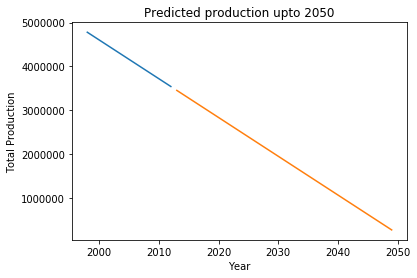

In [17]:
plt.plot(X, y_predict)

# predict the honey production in 2050 ===============================
X_future = np.array(range(2013, 2050))


# reshape for Scikit-Learn - requires 2D array
# reshape() as rotating this array. Rather than one big row of numbers, 
# X_future is now a big column of numbers — there's one number in each row.
X_future = X_future.reshape(-1, 1) 

# the y-values that your regr model would predict for the values of X_future.
future_predict = regr.predict(X_future)
plt.plot(X_future, future_predict)

plt.title('Predicted production upto 2050')
plt.xlabel('Year')
plt.ylabel('Total Production')
